In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Matic.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 26, 2021",1.08043,0.93907,1.11989,0.93270,475.02M,15.05%
1,"Jul 25, 2021",0.93908,0.93645,0.93983,0.88757,195.71M,2.18%
2,"Jul 24, 2021",0.91908,0.94888,0.94944,0.91109,254.68M,-3.14%
3,"Jul 23, 2021",0.94888,0.88057,0.95503,0.85963,331.59M,7.76%
4,"Jul 22, 2021",0.88059,0.88810,0.92918,0.84360,449.24M,-0.78%


In [3]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
756,"Jul 01, 2019",0.02238,0.02216,0.02310,0.02014,974.46M,1.05%
757,"Jun 30, 2019",0.02215,0.02414,0.02682,0.02201,1.52B,-8.24%
758,"Jun 29, 2019",0.02414,0.01920,0.02651,0.01920,1.79B,25.71%
759,"Jun 28, 2019",0.01920,0.01939,0.02115,0.01906,929.60M,-0.98%
760,"Jun 27, 2019",0.01939,0.01794,0.02163,0.01729,1.56B,8.10%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      761 non-null    object 
 1   Price     761 non-null    float64
 2   Open      761 non-null    float64
 3   High      761 non-null    float64
 4   Low       761 non-null    float64
 5   Vol.      761 non-null    object 
 6   Change %  761 non-null    object 
dtypes: float64(4), object(3)
memory usage: 41.7+ KB


In [5]:
df.Date = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      761 non-null    datetime64[ns]
 1   Price     761 non-null    float64       
 2   Open      761 non-null    float64       
 3   High      761 non-null    float64       
 4   Low       761 non-null    float64       
 5   Vol.      761 non-null    object        
 6   Change %  761 non-null    object        
 7   Year      761 non-null    int64         
 8   Month     761 non-null    int64         
 9   Day       761 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 59.6+ KB


In [7]:
l=[]
for i in df['Vol.'] :
    if i[-1] == 'M':
        l.append(i[:-1])
    elif i[-1] == 'B':
        l.append(i[:-1]+'e3')
        
df['Volume in Mill'] = l
df['Volume in Mill'] = df['Volume in Mill'].astype('float')

In [8]:
p =[]
for i in df['Change %']:
    p.append(i.strip('%'))
    
df['% Change'] = p
df['% Change'] = df['% Change'].astype('float')

In [9]:
df['logPrice'] = np.log(df['Price'])
df['logChange'] = df.logPrice.diff()

In [11]:
df.drop(['Vol.','Change %'],axis=1)

,Date,Price,Open,High,Low,Year,Month,Day,Volume in Mill,% Change,logPrice,logChange
0,2021-07-26,1.08043,0.93907,1.11989,0.93270,2021,7,26,475.02,15.05,0.077359,NaN
1,2021-07-25,0.93908,0.93645,0.93983,0.88757,2021,7,25,195.71,2.18,-0.062855,-0.140214
2,2021-07-24,0.91908,0.94888,0.94944,0.91109,2021,7,24,254.68,-3.14,-0.084382,-0.021528
3,2021-07-23,0.94888,0.88057,0.95503,0.85963,2021,7,23,331.59,7.76,-0.052473,0.031909
4,2021-07-22,0.88059,0.88810,0.92918,0.84360,2021,7,22,449.24,-0.78,-0.127163,-0.074690
...,...,...,...,...,...,...,...,...,...,...,...,...
756,2019-07-01,0.02238,0.02216,0.02310,0.02014,2019,7,1,974.46,1.05,-3.799588,0.112435
757,2019-06-30,0.02215,0.02414,0.02682,0.02201,2019,6,30,1520.00,-8.24,-3.809918,-0.010330
758,2019-06-29,0.02414,0.01920,0.02651,0.01920,2019,6,29,1790.00,25.71,-3.723885,0.086033
759,2019-06-28,0.01920,0.01939,0.02115,0.01906,2019,6,28,929.60,-0.98,-3.952845,-0.228960


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            761 non-null    datetime64[ns]
 1   Price           761 non-null    float64       
 2   Open            761 non-null    float64       
 3   High            761 non-null    float64       
 4   Low             761 non-null    float64       
 5   Vol.            761 non-null    object        
 6   Change %        761 non-null    object        
 7   Year            761 non-null    int64         
 8   Month           761 non-null    int64         
 9   Day             761 non-null    int64         
 10  Volume in Mill  761 non-null    float64       
 11  % Change        761 non-null    float64       
 12  logPrice        761 non-null    float64       
 13  logChange       760 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)
memo

In [16]:
var=['Price','Volume in Mill','% Change','logPrice','logChange']
df[var].describe()

,Price,Volume in Mill,% Change,logPrice,logChange
count,761.000000,761.000000,761.000000,761.000000,760.000000
mean,0.192722,451.535624,0.954915,-3.251928,-0.005290
std,0.417997,409.462316,9.264036,1.537611,0.091106
min,0.008110,67.390000,-51.940000,-4.814657,-0.468918
25%,0.015070,204.540000,-3.720000,-4.195049,-0.041055
50%,0.019630,332.660000,0.040000,-3.930696,-0.000456
75%,0.034030,551.300000,4.210000,-3.380513,0.038198
max,2.450040,6200.000000,59.830000,0.896104,0.732347


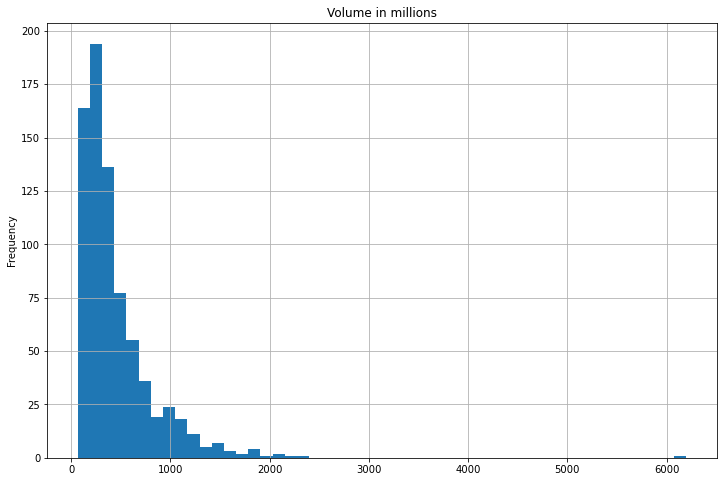

In [22]:
plt.figure(figsize=(12,8))
df['Volume in Mill'].plot(kind='hist',bins = 50)
plt.title('Volume in millions')
plt.grid(True)
plt.show()

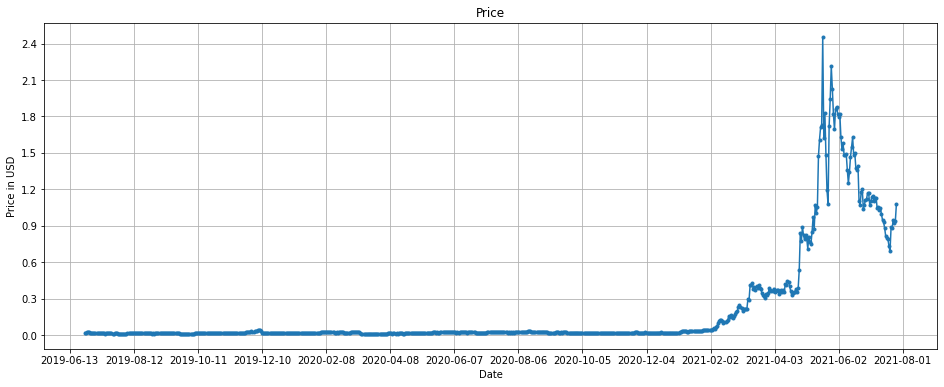

In [31]:
# plot price development
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Price')
plt.grid()
plt.show()

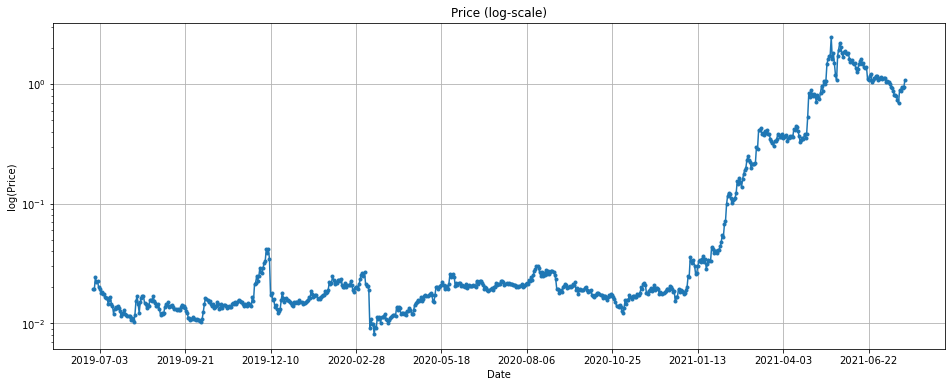

In [33]:
# plot price development - log scale
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Price, marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.xlabel('Date')
plt.ylabel('log(Price)')
ax.set_yscale('log')
plt.title('Price (log-scale)')
plt.grid()
plt.show()

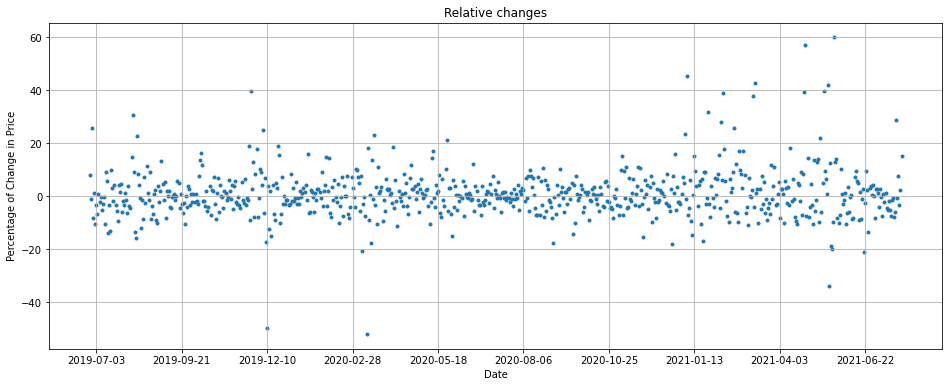

In [29]:
# plot relative changes of price
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df.Date, df['% Change'], marker='.')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.xlabel('Date')
plt.ylabel('Percentage of Change in Price')
plt.title('Relative changes')
plt.grid()
plt.show()

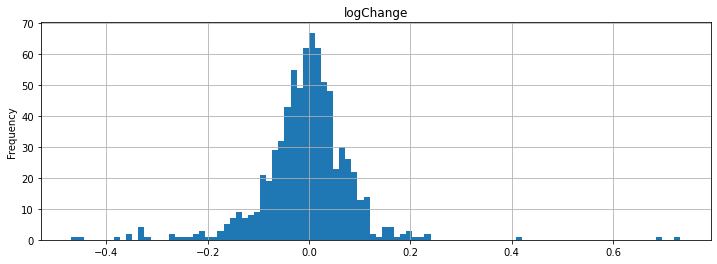

In [34]:
# distribution of log change
plt.figure(figsize=(12,4))
df.logChange.plot(kind='hist', bins=100)
plt.title('logChange')
plt.grid()
plt.show()

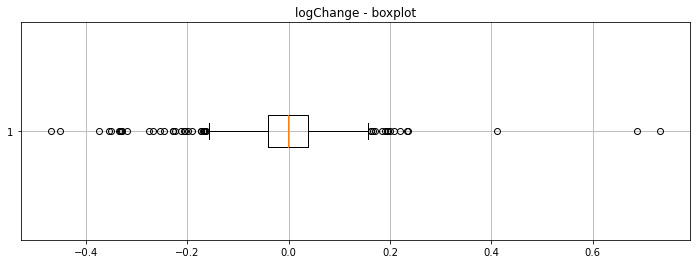

In [35]:
foo = df.logChange[~df.logChange.isna()] # filter missings
plt.figure(figsize=(12,4))
plt.boxplot(foo, vert=False)
plt.title('logChange - boxplot')
plt.grid()
plt.show()

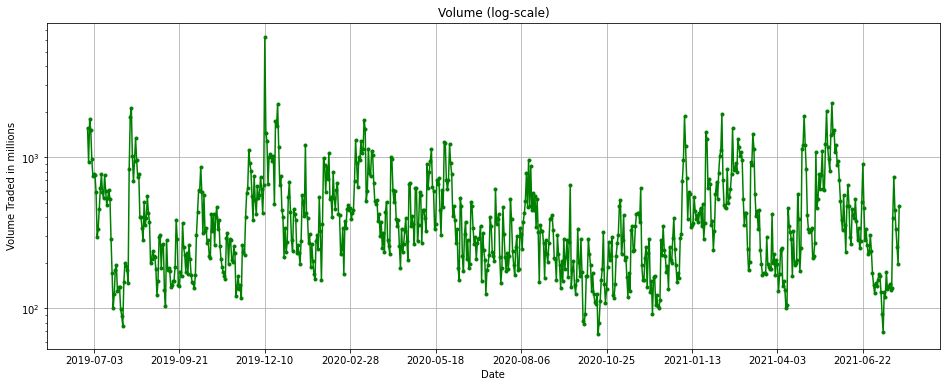

In [37]:
# plot volume development - log scale
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Volume in Mill'], marker='.', 
        color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # reduce number of x-labels
plt.xlabel('Date')
plt.ylabel('Volume Traded in millions')
ax.set_yscale('log')
plt.title('Volume (log-scale)')
plt.grid()
plt.show()

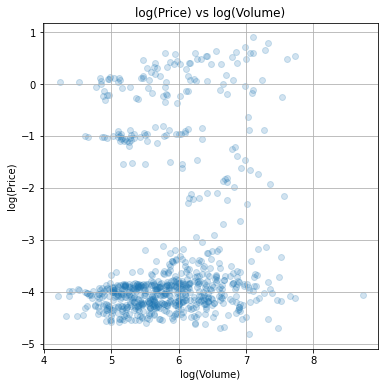

In [38]:
# plot price vs volume (each in log scale)
plt.figure(figsize=(6,6))
plt.scatter(np.log(df['Volume in Mill']), df.logPrice, alpha=0.2)
plt.title('log(Price) vs log(Volume)')
plt.xlabel('log(Volume)')
plt.ylabel('log(Price)')
plt.grid()
plt.show()

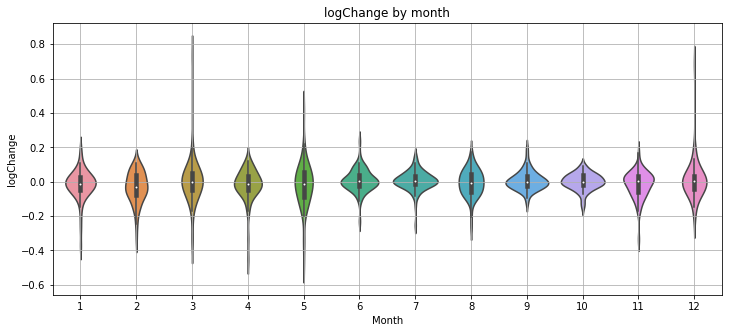

In [39]:
# log change distribution by month
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='Month', y='logChange')
plt.title('logChange by month')
plt.grid()

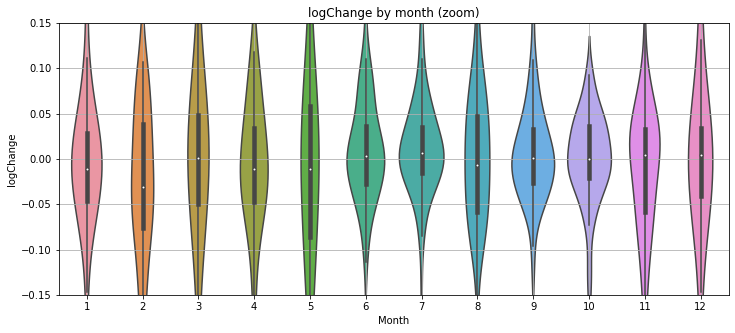

In [40]:
# log change distribution by month - zoom in
y_max = 0.15
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='Month', y='logChange')
plt.ylim(-y_max, y_max) # cap outliers
plt.title('logChange by month (zoom)')
plt.grid()

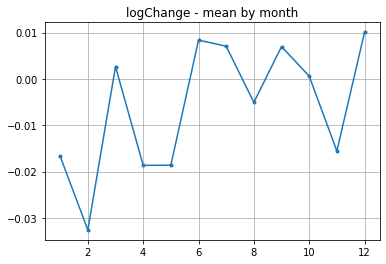

In [41]:
# evaluate mean values by month
logC_month = df.groupby(by='Month')['logChange'].mean()
plt.plot(logC_month, marker='.')
plt.title('logChange - mean by month')
plt.grid()
plt.show()